# ECE 5470 Lab 2 Report

## by Cynthia Li (xl827)

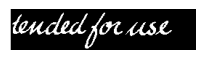

im1.vx
<scaled size: (56 x 256) >


In [114]:
import numpy as np
from v4 import vx
from v4 import vd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

vd.dispmvx("im1.vx", size=0.3, capt="im1.vx")


### Section 2

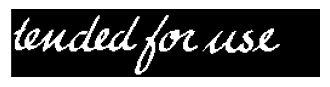

Original .vx file: text of 'tended to use'
<scaled size: (56 x 256) >


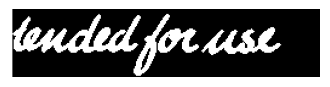

.mx file: thickened text of 'tended for use'
<scaled size: (56 x 256) >


In [47]:
vd.dispmvx("im1.vx", size = 0.5, capt="Original .vx file: text of 'tended to use'")
vd.dispmvx("im1.mx", size = 0.5, capt=".mx file: thickened text of 'tended for use'")

### Section 3
#### 3.1 Test image presentation

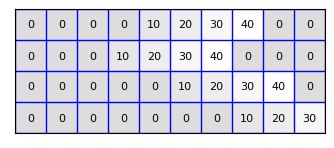

small image for test
<scaled size: (4 x 10) >


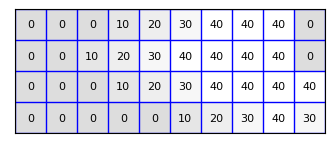

small image after vtempy
<scaled size: (4 x 10) >


In [112]:
vd.dispsvx('smallim.vx', capt='small image for test')
vd.dispsvx('smallim.mx', capt="small image after vtempy")

From the output of the first small image we created, we observe that the after vtempy is applied, the non-zero values would cover the nearest neighbor pixel around it with a bigger value between itself and that neighbor. This is especially obvious looking at the 40 in the original image's second row. This suggests that vtempy is a local max filter that recursively replace the each pixel's nearest neighbor value with the larger value between the neighbor and examined pixel. And then in the modified image, look at each 5-pixel cross-shaped region centered at where the non-zero pixels are located in the original region, we can confirm that our assumption that vtempy is local max filter is correct.

With vtempy's function determined, I created a second small image (shown below) to better show how vtempy's algorithm and again, affirms the previous conclusion.

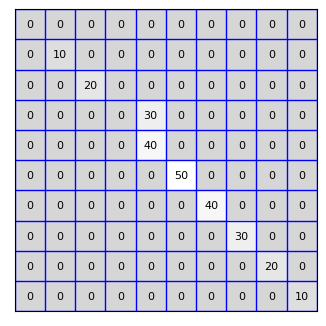

small image2
<scaled size: (10 x 10) >


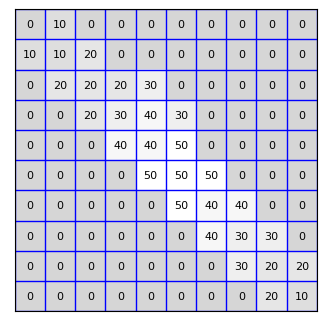

small image2 after vtempy
<scaled size: (10 x 10) >


In [95]:
vd.dispsvx('smallim2.vx', capt='small image2')
vd.dispsvx('smallim2.mx', capt="small image2 after vtempy")

The small image 2 after vtempy is the output of small image 2's vtempy filtering. The diagnal values in the small image 2 makes it easier to see how a pixel [x, y] compares its value with each of [x+1, y], [x-1, y], [x, y+1], [x, y-1] and replace it if [x, y] is larger. Each cross-shape 5-pixels centered at where the non-zero pixels in the original small image 2 are are replaced with the local maximum.

### Section 4 (Bound)
#### 4.1 Program description
The program boundpy is a python boundary detection function for pre-processed binary images. It takes in a binary image with background of 0 and foreground with non-zero values (image named as im) and outputs a boundary detected image.

How the program works in the following steps:
1. Check the command line, see if correct arguments are listed, prompt error messages if not.
2. Reads in the binary image specified in the command argument as 'if='.
2. Makes a copy of the image and embed the it with a width of one pixel (image named as tm). It is worth noticing that the index of pixels in im, im[y, x], corresponds to tm[y+1, x+1] in the embedded image. 
3. Examine through each pixel im starting from x=0, y=0.
4. Check if the current pixel has a non-zero value: If the check in step 4 is true, tm[y+1, x+1] is a foreground pixel; if it is false, tm[y+1, x+1] is a background pixel and nothing is done because it is already 0.
5. If the current pixel tm[y+1, x+1] is a foreground pixel, check the four pixels that are its 4-foreground-connected nearest neighbor (tm[y+2, x+1], tm[y+1, x+2], tm[y, x+1], tm[y+1, x]), see if any of them has a pixel value of 0: if true, current pixel tm[y+1, x+1] is connected to a background pixel, indicating it is a boundary pixel and the corresponding pixel in im, im[y, x], should change its value to 256; if false, current pixel tm[y+1, x+1] is a interior pixel and its corresponding pixel in im, im[y, x] should change its value to 128.
6. After each pixel is examined and updated, im becomes the desired output and will be write out to the file specied in the command arguemnts 'of='.

#### 4.2. Python Program code

In [ ]:
#!/usr/bin/env python

""" boundpy.py: Boundary detection in binary image
    This python program reads a binary image and outputs a binary image with boundary marked as 256,
    interior marked as 128 and background marked as 0.
"""

import sys
from numpy import *
from v4 import vx

# parse command parameters
of=''
vxif=''
vargs = vx.vaparse("if= of= -")
if '-' in vargs:
    print ("boundpy: boundary detection")
    print ("if= input file")
    print ("of= output file")
    exit()

# argument checks
if 'if' in vargs:
    inimage = vx.Vx(vargs['if'])
else:
    print ("boundpy error: 'if=' must be specified")
    exit()

if 'of' not in vargs:
    print ("boundpy error: 'of=' must be specified")
    exit()

# embed a copy of input image with width of 1 pixel
im = inimage.i
tmimage = vx.Vx(inimage)
tmimage.embedim((1, 1, 1, 1))
tm = tmimage.i

# check every pixel
for y in range (im.shape[0]):
    for x in range (im.shape[1]):
        ## check if the pixel is foreground pixel
        ## do nothing for background pixels since the input image already has background=0
        if (tm[y+1, x+1] > 0):
            ## check if any of the 4-foreground connected neighbor is a background pixel
            if (tm[y+2, x+1] == 0 or tm[y+1, x+2] == 0 or tm[y, x+1] == 0 or tm[y+1, x] == 0): ## current pixel is a boundary pixel if true
                im[y, x] = 255
            else: ## current pixel is interior pixel
                im[y, x] = 128

inimage.write(vargs['of'])


#### 4.3. Example of working program

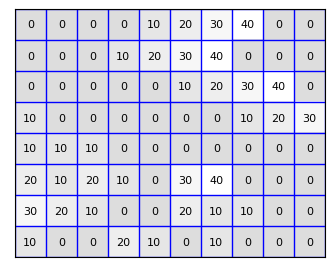

small test image: original
<scaled size: (8 x 10) >


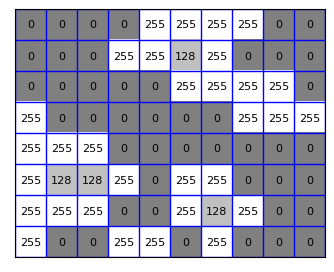

small test image: after bound detection
<scaled size: (8 x 10) >


In [94]:
vd.dispsvx('smallim1.vx', capt='small test image: original')
vd.dispsvx('smallim1.mx', capt="small test image: after bound detection")

From the output image content of the small image test shown above, we can clearly observe that the program works properly to detect multiple non-zero regions, change the boundaries of the regions to 255 and the interior to 128.

#### 4.4 Examples on full size images

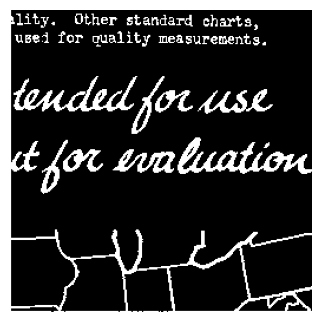

full size image: original
<scaled size: (256 x 256) >


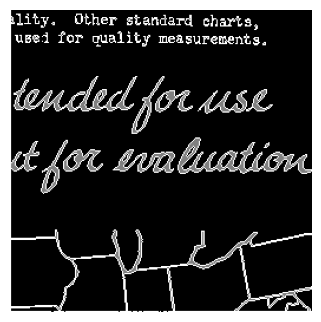

full size image: after bound detection
<scaled size: (256 x 256) >


In [93]:
vd.dispmvx('im3.vx', capt='full size image: original')
vd.dispmvx('im3_bd.vx', capt="full size image: after bound detection")

From the output image of the full size image test shown as above, we can clearly observe that the program can properly recognize non-zero regions, mark the boundary as white and change the interior to gray. 

#### Discussion
Some notes on code procedures.
The hardest part of this section for me is to understand the given template of vtempy, especially the part to set up the command arguments.
So from vtempy, I changed the command arguments for different print messages in the standard out, and deleted -v since we do not need it for this particular function. Besides, for easy operation to check neighbors of the pixel, I kept the section to make a embedded copy of the input image. What I changed is main algorithm that traverse through the corresponding pixels in the tm image to examine each pixel's value and its neighbors' values. Each pixel's value itself determines whether the pixel is foreground and background, and its neighbors' values determine whether it is a boundary or a interior pixel. Once we know the nature of the pixel, it is easy to change its value to the desired value.

### Section 5.(cclabel)

#### 5.1 Program description
The program cclabel is a python labeling function for pre-processed binary images. It takes in a binary image with background of 0 (below referred as im) and outputs a binary image with pixels in each non-zero region labeled with a number, starting from 1, and a RBG image in png format that displays labeled regions with different colors on the black background.

The program works in following stages:

Checking and Initializations:
    In this stage, the program will check command arguments, prompt error messages if needed, read in images, make an embedded copy, initialize global integer such as label number and setup arrays filled with zeros to store rgb value, and clear im so no label is made in the output image from start.

Main Computing algorithm:
    In this stage, the program traverse through each pixel, starting from x=0, y=0, to see if it is an unlabeled object pixel. If it is an unlabeled object pixel, the program will call function setlabel which will recursively call itself to label the entire object that the current pixel tm[y+1, x+1] is in, the current pixel indexes (x, y) and current label number (which start from 1) will be passed as parameters to setlabel. After setlabel finishes labeling the object and get back to the main stage, the program will increment the label number for the next object and then move on to check for the next unlabeled object pixel. For a pixel that is labeled or not an object component, we will not change its content.

SetLabel Function:
    In this function, the program receives input of pixel index x and y, and label number L, it will set the corresponding pixel in the output image (im[y, x]) to label number L, and the corresponding pixel in the RGB image array (color_label[y, x]) with weighted rgb values in terms of L. It will then examine if any 4-foreground-connected neighbor of the current pixel, which are im[y+1, x], im[y-1, x], im[y, x+1], im[y, x-1], is an unlabeled object pixel. If true, it indicates that the neighboring pixel is also in the same object, and setlabel will call setlabel with parameters of new pixel indexes and the same label number. Basically, setlabel is going to recursively examine neighboring object pixels until the entire object is labeled.

Generating Color Image and Output:
    In this stage, the program will generate image from rgb array and save it into png format. It will also write the labeled binary image to the output file specified by the command argument.

#### 5.2 cclabel Python Program Code

In [ ]:
#!/usr/bin/env python
""" cclabel: a python region labeling function
    This python program reads in a segmented binary image with background set to 256.
    It will output a binary image with each separate non-zero region marked with number, counted from 1.
    It will also generate a colored png image that 
"""

import sys
import numpy as np
from v4 import vx
from PIL import Image

# System's default recursion limitation is 1000,
# This is intended for some full-size images.
sys.setrecursionlimit(10000)

# parse command arguments
of=' '
vxif=' '
vargs = vx.vaparse( "if= of= -")
if '-' in vargs:
    print ("cclabel region labeling program")
    print ("if= input file")
    print ("of= output file")
    exit(0)

# Function setlabel: recursively called to label a unlabeled non-zero region by traverse through unlabeled non-zero neighboring pixels, 
#                    for each pixel, it will update label at current pixel im[y, x], update rgb value at color_label[y, x],
# input: index of current object pixel, x (for row), y (for column), and L for label number
def setlabel (x, y, L):
    global im, tm
    im[y,x] = L
    # weight red, green, and blue channels differently for color
    # label number L is used to change the color of different sections
    color_label[y, x] = [L*120%256, L*160%256, L*200%256]
    if (tm[y+2, x+1] != 0 and im[y+1, x] == 0):
        setlabel(x, y+1, L)
    if (tm[y+1, x+2] != 0 and im[y, x+1] == 0):
        setlabel(x+1, y, L)
    if (tm[y+1, x] != 0 and im[y, x-1] == 0):
        setlabel(x-1, y, L)
    if (tm[y, x+1] != 0 and im[y-1, x] == 0):
        setlabel(x, y-1, L)

# check for input file name argument
if 'if' in vargs:
    inimage = vx.Vx(vargs['if'])
else:
    print ( 'cclabel  error: if= must be specified')
    exit()

# check for output file name argument
if 'of' not in vargs:
    print ( 'cclabel error: of= must be specified')
    exit()

# create embedded copy and initialize label number
im = inimage.i
tmimage = vx.Vx(inimage) 
tmimage.embedim((1,1,1,1))
tm = tmimage.i
L = 1

# generate a unique name for the colored image file
img_name = "colored_"
s_length = len(vargs['if'])
s_length -= 3
img_name += vargs['if'][:s_length] # get rid of the input file extenstion
img_name += "_cl.png"

# clear the output image
for y in range(im.shape[0]):
    for x in range(im.shape[1]):
        im[y, x] = 0

# Initialize a same-size array as im but with three channels filled with 0
# To store the RGB value for each pixel
color_label = np.zeros([im.shape[0], im.shape[1], 3], dtype=np.uint8)

# examine through every pixel
for y in range(im.shape[0]):
    for x in range(im.shape[1]):
        if (im[y, x] == 0 and tm[y+1, x+1] != 0): ## check if the pixel is an unlabeled object pixel
            setlabel(x, y, L) ## label the current object
            L = L + 1 ## increment label number for the next object

# generate RGB image from array 'color_label'
color = Image.fromarray(color_label)
# save the RGB image in png format
color.save(img_name)

inimage.write(vargs['of'])


#### 5.3 Small image tests
        

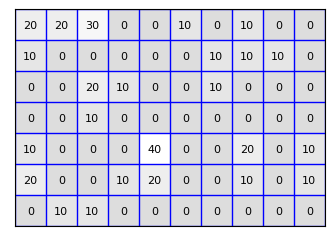

small test image: Original
<scaled size: (7 x 10) >


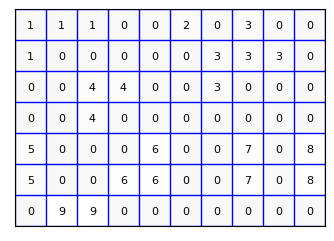

small test image: labeled
<scaled size: (7 x 10) >


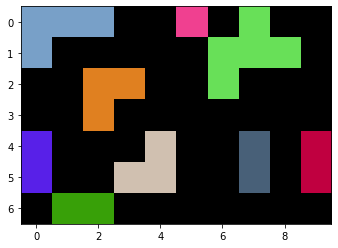

In [123]:
vd.dispsvx('testa.vx',  capt='small test image: Original')
vd.dispsvx('testa_cl.vx', capt="small test image: labeled")
img1 = mpimg.imread('colored_testa_cl.png')
imgplot = plt.imshow(img1)
plt.show()

From the output images shown above, we can observe that the program can successfully find multiple non-zero regions (total of 9) and label them in sequence (from upper to lower, from left to right) with correct number. The RGB image can show colored regions in correct positions and with significantly different colors.

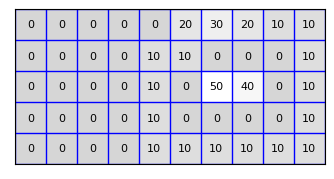

small test image: Original
<scaled size: (5 x 10) >


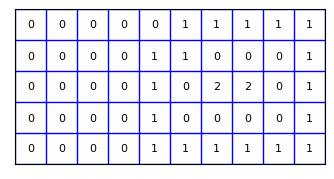

small test image: labeled
<scaled size: (5 x 10) >


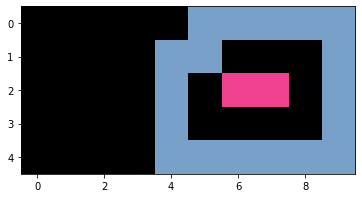

In [124]:
vd.dispsvx('testb.vx',  capt='small test image: Original')
vd.dispsvx('testb_cl.vx', capt="small test image: labeled")
img2 = mpimg.imread('colored_testb_cl.png')
imgplot = plt.imshow(img2)
plt.show()

The output image above shows that the program can recognize a component inside another component, separated by zeros, as a different one. 

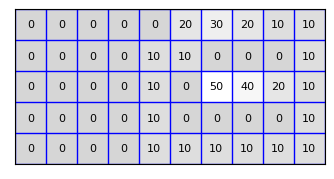

small test image c: Original
<scaled size: (5 x 10) >


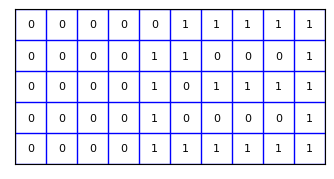

small test image c: labeled
<scaled size: (5 x 10) >


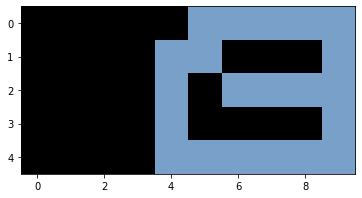

In [125]:
vd.dispsvx('testc.vx', capt='small test image c: Original')
vd.dispsvx('testc_cl.vx', capt="small test image c: labeled")
img3 = mpimg.imread('colored_testc_cl.png')
imgplot = plt.imshow(img3)
plt.show()

The output images above shows that the program can successfully recognize two components with weak connection (connected by 1 pixel) as one component.

#### 5.4 Large Image tests

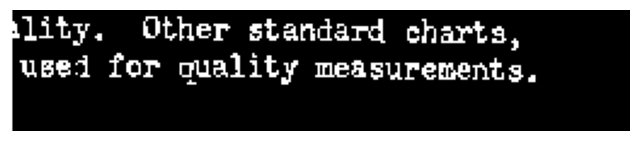

full size image: original
<scaled size: (50 x 256) >


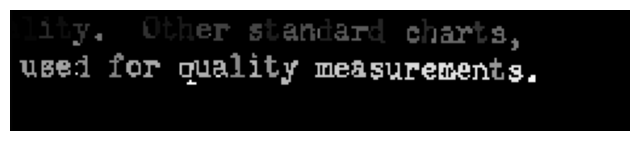

full size image: after color labeling
<scaled size: (50 x 256) >


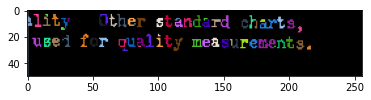

In [127]:
vd.dispmvx('im2.vx', capt='full size image: original')
vd.dispmvx("im2_cl.vx", capt="full size image: after color labeling")
img4 = mpimg.imread('colored_im2_cl.png')
imgplot = plt.imshow(img4)
plt.show()


The output image test shows that the program also works for full size images. It can recognize each separate regions and use different color representations.

#### Discussion
Notes proceeding through coding and some coding considerations.

1. In this section, I also used a template code which is for pixmax function, and again, I deleted '-v' in the command argument since it's unnecessary for this function. Command argument messages are changed correspondingly.
2. I imported sys and reset the default recursion limit as I got error messages saying that recursion depth is not enough for the full size image.
3. I also imported Image from PIL. This is needed for the colored image. The package is needed to convert array to image and save the image to png format.
4. An embedded copy of input is still needed for the convenience to check 4-foreground-connected neighbors.
5. The output image im should be cleared (set to 0) before actual algorithm for two reasons: first, this makes it easier to identify from tm that whether a pixel is non-zero (object pixel) and from im that whether the pixel is labeled; second, the image should be clean since no labeling is done yet at the start by logic.
6. The label number should be increased in the main algorithm because each setlabel called in the main algorithm completes labeling of one object, and main will look for the next object. If label number is updated in setlabel, it will be messed up during recursion.
7. setlabel simply applies recursion to four neighbor pixels of the root pixel if they are unlabeled and is within the object (it tends to form a tree with four branches from each node, but it's unlikely to be full or complete)
8. To make the region colorful, the RGB channels cannot have all the same values, therefore, I added weight to each channel. The combination of the weight is adjusted multiple times until I find the output satisfying showing on the testa.vx's corresponding colored image(showing enough color variance). Color difference between each region can be simply achieved by multiplying the weight and region label number. %256 is used because label number is not determined, if there is too many regions, we might eventually have channels' weighted value exceeding 255 and cause trouble. But with %256, we can ensure that the value will always fall within the range from 0 to 255.
9. There were actually two versions of the colored image code I made. The first one can generate a RGB image for the labeled image, however, it used the same file name as "coloredlabel.png," indicating the image will be overwritten once we execute the cclabel for a different input and the colored label version of the previous image would be lost. In this case, I invented the second version that can generate a unique file name for the input image's RGB output. What I did was to use a string "colored_", concatenated with the input file name (I cut the extension in the file name by getting the string length, minus 3 for ".vx" (call it s for now), and get vargs['if'][:s]), and again concatenated with a extension of "_cl.png" (.png is the real extension, I just want to add "_cl" to make it more recognizable as an output for cclabel).